<a href="https://colab.research.google.com/github/lucasfelipecdm/tech-challenge-fase-1/blob/develop/exploration/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploração de dados

Nessa fase carregaremos os dados da base e exploraremos suas características, como tipos de colunas, seus conteúdos, analisaremos estatísticas descritivas e visualizaremos distribuições relevantes.

### Configuração inicial e Análise dos dados

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import os

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
plt.figure(figsize=(10,5))

dataset_url = "https://raw.githubusercontent.com/lucasfelipecdm/tech-challenge-fase-1/develop/data/insurance.csv"
dataset = pd.read_csv(dataset_url)
dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Figure size 1000x500 with 0 Axes>

Acima podemos ver as configurações iniciais, carregamento da base de dados e observação do conteúdo da base dados

In [ ]:

dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
dataset.shape

(1338, 7)

Podemos ver que a base de dados é composta por 1338 linhas e 7 colunas, sendo elas: idade, gênero, imc, filhos, fumante, região, encargos ( porém descritas em inglês ).

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Usando o método `.info()` podemos verificar os tipos de váriaveis de cada coluna ao mesmo tempo que verificamos se existem valores nulos em alguma linha. A seguir utilizaremos outros dois comandos para verificar novamente se existem valores nulos porém de forma mais clara e também se existem linhas duplicadas.


In [ ]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
dataset.duplicated().sum()

1

In [ ]:
dataset.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Acima utilizamos dois comandos para verificar se existem valores nulos ou duplicados em nossa base de dados, sendo eles respectivamente: `.isnull()` e `.duplicated()` e utilizamos o método `.sum()` para ajudar na visualização desses dados.

Podemos notar que o retorno de `.duplicated()` foi 1, sendo assim utilizamos o método `.drop_duplicates()` para remover essa linha duplicada.

Também podemos notar que não existem valores nulos, mas caso existissem poderiamos utilizar algumas formas de tratativas, utilizando o valor médio da coluna para preencher as colunas ou até mesmo dropar as colunas com valores faltantes.

### Análise dos tipos de dados e distribuição relevantes

#### Váriaveis numéricas

Agora faremos a verificação e análise dos valores numéricos e suas distribuições, eles estão distribuídos nas seguintes colunas: idade, imc, filhos, encargos.

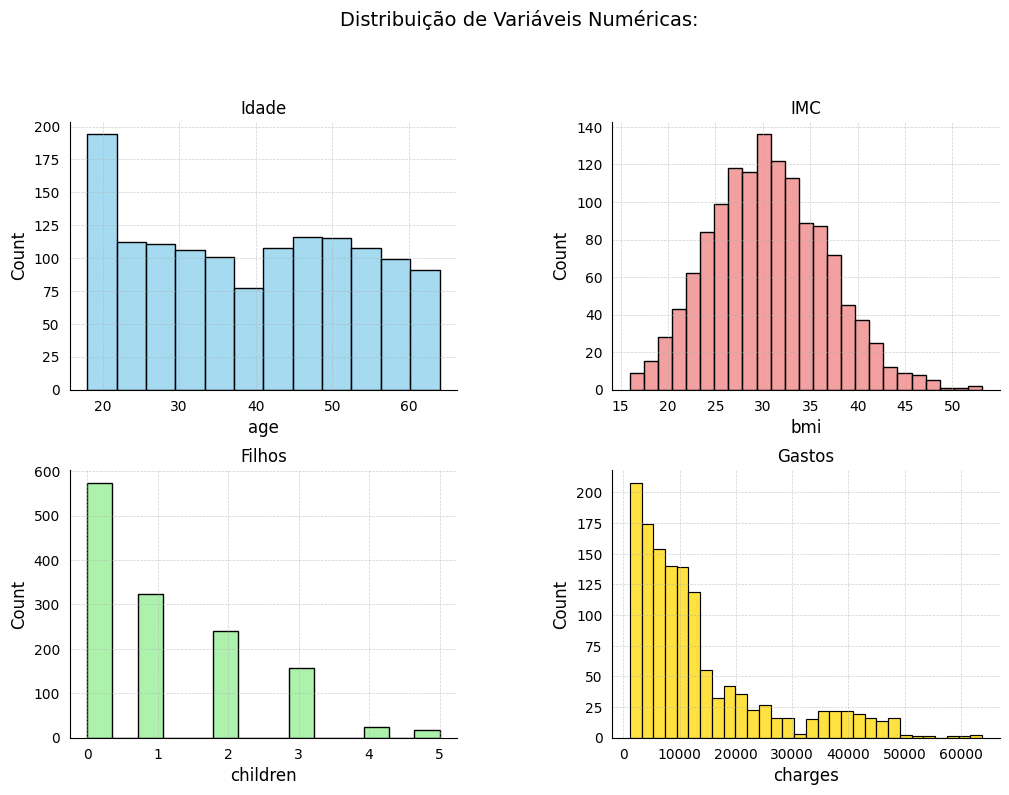

In [25]:
plt.figure(figsize=(12, 8))
gridspec = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

ax1 = plt.subplot(gridspec[0, 0])
sns.histplot(dataset['age'], ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Idade', fontsize=12)

ax2 = plt.subplot(gridspec[0, 1])
sns.histplot(dataset['bmi'], ax=ax2, color='lightcoral', edgecolor='black')
ax2.set_title('IMC', fontsize=12)

ax3 = plt.subplot(gridspec[1, 0])
sns.histplot(dataset['children'], ax=ax3, color='lightgreen', edgecolor='black')
ax3.set_title('Filhos', fontsize=12)

ax4 = plt.subplot(gridspec[1, 1])
sns.histplot(dataset['charges'], ax=ax4, color='gold', edgecolor='black')
ax4.set_title('Gastos', fontsize=12)

plt.suptitle('Distribuição de Variáveis Numéricas:', fontsize=14, y=1.02)

for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(bottom=False, left=False)
    ax.xaxis.grid(True, linestyle='--', alpha=0.6, which='both', linewidth=0.5)
    ax.yaxis.grid(True, linestyle='--', alpha=0.6, which='both', linewidth=0.5)

plt.tight_layout()

plt.show()

Podemos notar que somente o IMC se aproxima de distribuíção normal(Gaussiana), agora vamos verificar se as variavéis numéricas apresentão muitos outliers o que pode interferir no aprendizado do nosso modelo.

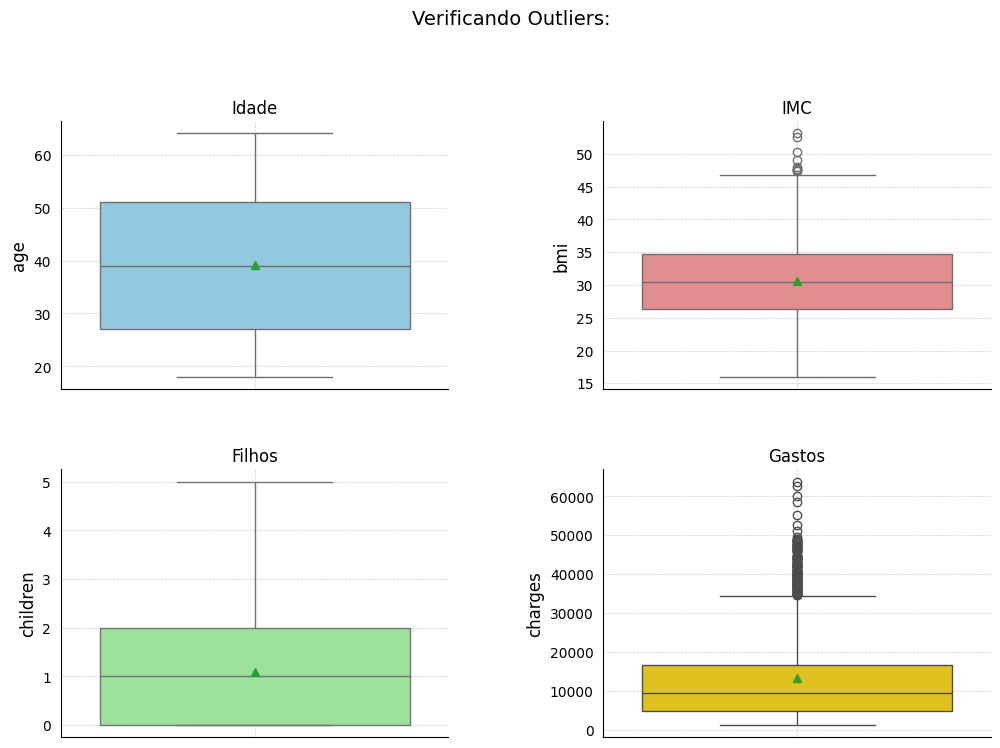

In [26]:
plt.figure(figsize=(12, 8))
gridspec = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

ax1 = plt.subplot(gridspec[0, 0])
sns.boxplot(dataset['age'], ax=ax1, color='skyblue', showmeans=True)
ax1.set_title('Idade', fontsize=12)

ax2 = plt.subplot(gridspec[0, 1])
sns.boxplot(dataset['bmi'], ax=ax2, color='lightcoral', showmeans=True)
ax2.set_title('IMC', fontsize=12)

ax3 = plt.subplot(gridspec[1, 0])
sns.boxplot(dataset['children'], ax=ax3, color='lightgreen', showmeans=True)
ax3.set_title('Filhos', fontsize=12)

ax4 = plt.subplot(gridspec[1, 1])
sns.boxplot(dataset['charges'], ax=ax4, color='gold', showmeans=True)
ax4.set_title('Gastos', fontsize=12)

plt.suptitle('Verificando Outliers:', fontsize=14, y=1.02)
for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(bottom=False, left=False)
    ax.grid(True, linestyle='--', alpha=0.6, which='both', linewidth=0.5)

plt.tight_layout()

plt.show()

Podemos observar que a idade e o número de filhos não possuem outliers. Porém o encargo possui muitos e o IMC possui alguns, trataremos esses casos durante o pré-processamento de nossos dados, na próxima etapa.

#### Váriaveis categóricas

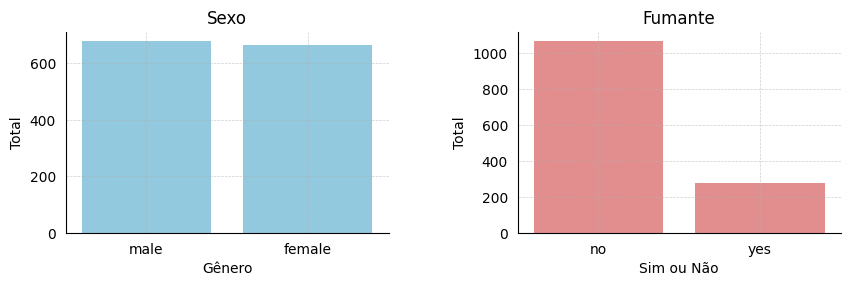

In [27]:
plt.figure(figsize=(10, 6))
gridspec = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

count_gender = dataset['sex'].value_counts()

ax1 = plt.subplot(gridspec[0, 0])
sns.barplot(x=count_gender.index, y=count_gender.values, ax=ax1, color='skyblue')
ax1.set_title('Sexo', fontsize=12)
ax1.set_xlabel('Gênero', fontsize=10)
ax1.set_ylabel('Total', fontsize=10)

count_smoking = dataset['smoker'].value_counts()

ax2 = plt.subplot(gridspec[0, 1])
sns.barplot(x=count_smoking.index, y=count_smoking.values, ax=ax2, color='lightcoral')
ax2.set_title('Fumante', fontsize=12)
ax2.set_xlabel('Sim ou Não', fontsize=10)
ax2.set_ylabel('Total', fontsize=10)

for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(bottom=False, left=False)
    ax.grid(True, linestyle='--', alpha=0.6, which='both', linewidth=0.5)

plt.tight_layout()

plt.show()

Podemos analisar através dos dois gráficos que temos uma distribuição bem próxima de registro de homens e mulheres. Mas possuímos muito mais não fumantes do que fumantes.

Agora vamos verificar a relação entre as váriaveis e nosso "target" que é nossa coluna de **Encargos**.

### Váriaveis e suas correlações

Agora vamos observar as relações entre as váriaveis para possiveis insights e determinação de quais dados terão maior e menor relevância durante a criação e treinamento de nosso modelo.

<Figure size 640x480 with 0 Axes>

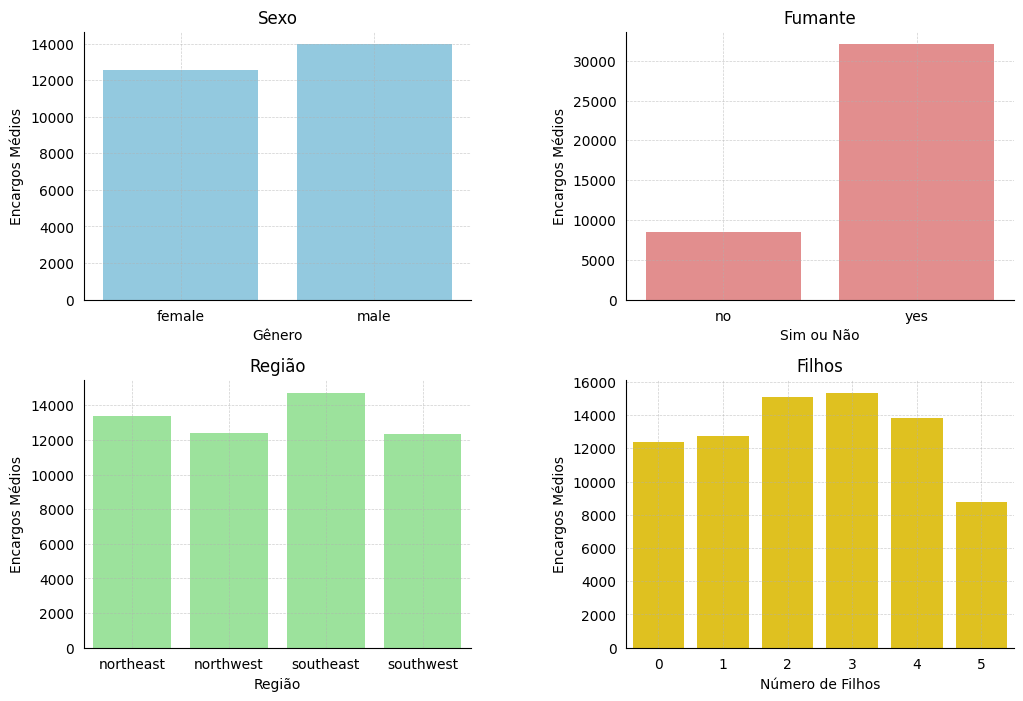

In [29]:
sex_charges_mean = dataset[['sex', 'charges']].groupby('sex', as_index = False).mean()
smoker_charges_mean = dataset[['smoker', 'charges']].groupby('smoker', as_index = False).mean()
region_charges_mean = dataset[['region', 'charges']].groupby('region', as_index = False).mean()
children_charges_mean = dataset[['children', 'charges']].groupby('children', as_index = False).mean()

plt.suptitle('Correlação entre variáveis e valor médio da target:', fontsize=14)
plt.figure(figsize=(12, 8))
gridspec = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

ax1 = plt.subplot(gridspec[0, 0])
sns.barplot(x=sex_charges_mean['sex'], y=sex_charges_mean['charges'], ax=ax1, color='skyblue')
ax1.set_title('Sexo', fontsize=12)
ax1.set_xlabel('Gênero', fontsize=10)
ax1.set_ylabel('Encargos Médios', fontsize=10)

ax2 = plt.subplot(gridspec[0, 1])
sns.barplot(x=smoker_charges_mean['smoker'], y=smoker_charges_mean['charges'], ax=ax2, color='lightcoral')
ax2.set_title('Fumante', fontsize=12)
ax2.set_xlabel('Sim ou Não', fontsize=10)
ax2.set_ylabel('Encargos Médios', fontsize=10)

ax3 = plt.subplot(gridspec[1, 0])
sns.barplot(x=region_charges_mean['region'], y=region_charges_mean['charges'], ax=ax3, color='lightgreen')
ax3.set_title('Região', fontsize=12)
ax3.set_xlabel('Região', fontsize=10)
ax3.set_ylabel('Encargos Médios', fontsize=10)

ax4 = plt.subplot(gridspec[1, 1])
sns.barplot(x=children_charges_mean['children'], y=children_charges_mean['charges'], ax=ax4, color='gold')
ax4.set_title('Filhos', fontsize=12)
ax4.set_xlabel('Número de Filhos', fontsize=10)
ax4.set_ylabel('Encargos Médios', fontsize=10)

for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(bottom=False, left=False)
    ax.grid(True, linestyle='--', alpha=0.6, which='both', linewidth=0.5)
    plt.tight_layout()

plt.show()

Podemos notar que o dado que mais tem relação entre o valor do encargo é a se o contratante é fumante ou não, também existe uma pequena variação caso seja do gênero masculino, já a região e o número de filhos não possuí muita influência sobre o custo de encargos.

In [ ]:
fig = px.scatter(dataset, x='age',  y='charges', color='smoker', opacity=0.8,
                 title='Scatter Plot: Idade vs. Encargos (Colorido pelo fato de ser fumante ou não)',
                 color_discrete_map={'yes': 'red', 'no': 'blue'},
                 width=800, height=400)

fig.show()

Podemos ver através do plot Scatter acima que existe uma correlação entre o valor do encargo e a idade do contratante. Também podemos observar que o valor sobe de forma significativa caso o contratante também seja fumante.

In [ ]:
fig = px.scatter(dataset, x='bmi',  y='charges', color='smoker',
                 opacity=0.8,  title='Scatter Plot: IMC vs. Encargos (Colorido pelo fato de ser fumante ou não)',
                 color_discrete_map={'yes': 'red', 'no': 'blue'},
                 width=800, height=400)
fig.show()

Podemos ver através do plot Scatter acima que para contratantes não fumantes não existe uma mudança significativa de preço mesmo que o IMC delas apresente valores maiores ou menores que o IMC tido como normal ( Entre 18,5 e 24,9 ).